In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import zipfile
from os import getcwd
from tensorflow import keras
%matplotlib inline

In [2]:
local_zip = f'{getcwd()}/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
local_zip = f'{getcwd()}/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

In [5]:
rock_val_dir = os.path.join('/tmp/rps-test-set/rock')
paper_val_dir = os.path.join('/tmp/rps-test-set/paper')
scissors_val_dir = os.path.join('/tmp/rps-test-set/scissors')

In [6]:
print('No of images in rock training dir', len(os.listdir(rock_dir)))
print('No of images in paper training dir', len(os.listdir(paper_dir)))
print('No of images in scissor training dir', len(os.listdir(scissors_dir)))

No of images in rock training dir 840
No of images in paper training dir 840
No of images in scissor training dir 840


In [7]:
print('No of images in rock validation dir', len(os.listdir(rock_val_dir)))
print('No of images in paper validation dir', len(os.listdir(paper_val_dir)))
print('No of images in scissor validation dir', len(os.listdir(scissors_val_dir)))

No of images in rock validation dir 124
No of images in paper validation dir 124
No of images in scissor validation dir 124


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [9]:
#FOR DATA AUGMENTATION 

In [10]:
train_datagen = ImageDataGenerator(
    1./ 255,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rotation_range = 40,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
    
)

In [11]:
#CREATING TRAINING DATA AND VALIDATION DATA GENRATORS TO LOAD INTO THE MODEL

In [12]:
val_datagen = ImageDataGenerator(
    1./ 255
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    '/tmp/rps',
    batch_size = 126,
    target_size  = (150, 150),
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.


In [14]:
val_generator = val_datagen.flow_from_directory(
    '/tmp/rps-test-set',
    batch_size = 126,
    target_size = (150, 150),
    class_mode = 'categorical'
)

Found 372 images belonging to 3 classes.


In [15]:
#CREATING A CALLBACK WHICH WOULD STOP MY TRAINING AT THE END OF 98% ACCURACY

In [16]:
class my_callback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc')> 0.98):
            print('You have reached 98% accuracy')
            self.model.stop_training = True
callback = my_callback()

In [17]:
#USING 4 CONVOLUTIONAL LAYERS AND A DROPOUT TOO(SO MY VALIDATION DATA DOESN'T OVERFIT)

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), input_shape = (150, 150, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [20]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [21]:
from PIL import Image
history = model.fit_generator(
    train_generator,
    epochs = 25,
    validation_data = val_generator,
    callbacks = [callback],
    verbose = 1
)

Instructions for updating:
Please use Model.fit, which supports generators.


C:\Users\QUANTUM\Anaconda3\envs\Tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/25


C:\Users\QUANTUM\Anaconda3\envs\Tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


20/20 [==============================] - 117s 6s/step - loss: 13.3101 - acc: 0.3714 - val_loss: 1.2016 - val_acc: 0.4032
Epoch 2/25
20/20 [==============================] - 116s 6s/step - loss: 1.7102 - acc: 0.4246 - val_loss: 0.9132 - val_acc: 0.4677
Epoch 3/25
20/20 [==============================] - 115s 6s/step - loss: 1.0921 - acc: 0.4857 - val_loss: 0.8669 - val_acc: 0.5161
Epoch 4/25
20/20 [==============================] - 114s 6s/step - loss: 1.0402 - acc: 0.5433 - val_loss: 0.8570 - val_acc: 0.5995
Epoch 5/25
20/20 [==============================] - 115s 6s/step - loss: 0.8651 - acc: 0.6159 - val_loss: 0.6164 - val_acc: 0.8441
Epoch 6/25
20/20 [==============================] - 116s 6s/step - loss: 0.8454 - acc: 0.6175 - val_loss: 0.6779 - val_acc: 0.7097
Epoch 7/25
20/20 [==============================] - 114s 6s/step - loss: 0.7574 - acc: 0.6683 - val_loss: 0.5310 - val_acc: 0.8145
Epoch 8/25
20/20 [==============================] - 117s 6s/step - loss: 0.6844 - acc: 0.7159

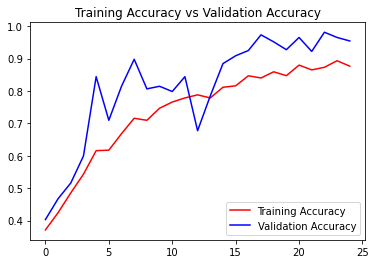

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')

plt.title('Training Accuracy vs Validation Accuracy')
plt.legend(loc = 0)

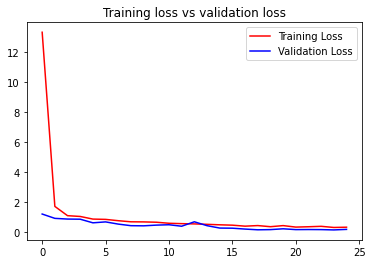

In [23]:
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training loss vs validation loss')
plt.legend(loc =0)

In [24]:
test_dir = f'{getcwd()}/rps-validation.zip'

In [25]:
zip_ref = zipfile.ZipFile(test_dir)
zip_ref.extractall('/tmp/')
zip_ref.close()

In [26]:
len(os.listdir('/tmp/'))

36

[[0.332466   0.34029514 0.32723886]]


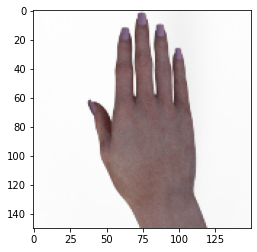

In [27]:
img1 = image.load_img('/tmp/rps-validation/paper6.png', target_size=(150, 150))
img = image.img_to_array(img1)
img = img/ 255.
img = np.expand_dims(img, axis=0)
images = np.vstack([img])
prediction = model.predict(images, batch_size=10)
plt.imshow(img1)
print(prediction)


In [28]:
from tensorflow.keras.models import load_model

In [29]:
model.save('rpsidmain.h5')

In [30]:
my_model = load_model('rpsidmain.h5')